In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os.path as path
import os
import wget

# Punto 6

# LINEAL

Para encontrar los valores de los parámetros $a_0$ y $a_1$ que minimizan la función de costo $\chi^2(a_0, a_1)$, se pueden utilizar las derivadas parciales de la función respecto a $a_0$ y $a_1$, e igualarlas a cero. Las derivadas parciales son:

\begin{align}
\frac{\partial \chi^2}{\partial a_0} &= -2\sum_{i=1}^n (y_i - a_0 - a_1 x_i) \
\frac{\partial \chi^2}{\partial a_1} &= -2\sum_{i=1}^n x_i(y_i - a_0 - a_1 x_i)
\end{align}

Igualando estas expresiones a cero, se obtienen las siguientes ecuaciones:

\begin{align}
0 &= -2\sum_{i=1}^n (y_i - a_0 - a_1 x_i) \
0 &= -2\sum_{i=1}^n x_i(y_i - a_0 - a_1 x_i)
\end{align}

Resolviendo para $a_0$ y $a_1$, se obtiene:

\begin{align}
a_0 &= \bar{y} - a_1 \bar{x} \
a_1 &= \frac{\sum_{i=1}^n x_i y_i - \frac{1}{n} \left(\sum_{i=1}^n x_i \right) \left(\sum_{i=1}^n y_i \right)}{\sum_{i=1}^n x_i^2 - \frac{1}{n} \left(\sum_{i=1}^n x_i \right)^2}
\end{align}

donde $\bar{x}$ y $\bar{y}$ son los valores medios de las variables $x$ e $y$, respectivamente.

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/ModeloLineal.dat' 

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt"


if not path.exists(file):
    Path1_ = wget.download(url,file)
else:
    Path1_ = file

In [3]:
data=np.loadtxt(Path1_)

In [4]:
def fc(x, a):
    
    y=a[0]+a[1]*x
    return y

In [5]:
def LinealModel(x,y):
    cx=len(x)
    
    xs=np.sum(x)
    ys=np.sum(y)
    xm=np.mean(x)
    ym=np.mean(y)
    xy=np.sum(x*y)
    
    x2=np.sum(x**2)
    xs2=(np.sum(x)**2)/cx
    
    a1=(xy-(xs*ys)/cx)/(x2-xs2)
    a0=ym-a1*xm
    
    return a0, a1

In [6]:
x,y=data[:,0], data[:,1]
As=LinealModel(x,y)

xn=np.linspace(np.min(x), np.max(x), 100)
yn=fc(xn, As)
print('El valor que toma a0 es '+ str(As[0]))
print('El valor que toma a1 es '+ str(As[1]))

El valor que toma a0 es -5.129185528853004
El valor que toma a1 es 2.125036808008276


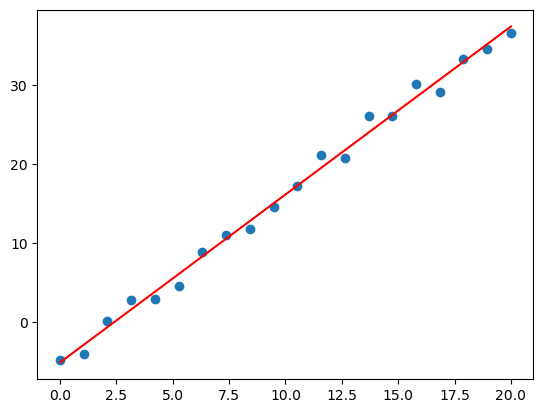

In [7]:
plt.scatter(x,y)
plt.plot(xn, yn, color='r')

# CUADRÁTICO

Los coeficientes de la primera ecuación $$(1, x, x^2)$$ existen en la segunda y tercera ecuaciones en la misma secuencia, pero multiplicados por x1. Si examinamos cuidadosamente las ecuaciones, podemos notar esto. Similar a la segunda ecuación, los coeficientes de la tercera ecuación $$(x, x^2, x^3)$$ ocurren en la misma secuencia pero se multiplican por x. Esto implica un patrón en el que los coeficientes de cada ecuación se mueven una potencia de x a la derecha de los coeficientes de la ecuación anterior.

Se ajustaron tres puntos de datos con una función cuadrática para producir este patrón. Los coeficientes de las ecuaciones normalmente crean un patrón cuando un polinomio de grado n se ajusta a n+1 puntos de datos.

\begin{equation}
\chi^2(a_0, a_1, a_2) = \sum_{i=1}^{n} (y_i - (a_0 + a_1 x_i + a_2 x_i^2))^2
\end{equation}

Expandiendo el término al cuadrado, tenemos:

\begin{equation}
\chi^2(a_0, a_1, a_2) = \sum_{i=1}^{n} (y_i^2 - 2y_i(a_0 + a_1 x_i + a_2 x_i^2) + (a_0 + a_1 x_i + a_2 x_i^2)^2)
\end{equation}

Desarrollando los términos al cuadrado, se obtiene:

\begin{align}
\chi^2(a_0, a_1, a_2) &= \sum_{i=1}^{n} (y_i^2 - 2a_0 y_i - 2a_1 x_i y_i - 2a_2 x_i^2 y_i \nonumber \
&+ a_0^2 + 2a_0 a_1 x_i + 2a_0 a_2 x_i^2 + a_1^2 x_i^2 + 2a_1 a_2 x_i^3 + a_2^2 x_i^4)
\end{align}

A continuación, tomamos las derivadas parciales de χ² con respecto a cada coeficiente y las igualamos a cero para minimizar la función de costo. Obtenemos:

\begin{equation}
\frac{\partial \chi^2}{\partial a_0} = -2 \sum_{i=1}^{n} (y_i - a_0 - a_1 x_i - a_2 x_i^2) = 0
\end{equation}

\begin{equation}
\frac{\partial \chi^2}{\partial a_1} = -2 \sum_{i=1}^{n} (x_i y_i - a_0 x_i - a_1 x_i^2 - a_2 x_i^3) = 0
\end{equation}

\begin{equation}
\frac{\partial \chi^2}{\partial a_2} = -2 \sum_{i=1}^{n} (x_i^2 y_i - a_0 x_i^2 - a_1 x_i^3 - a_2 x_i^4) = 0
\end{equation}

Resolviendo este sistema de ecuaciones, obtenemos los valores de $a_0$, $a_1$ y $a_2$ que minimizan χ².

\begin{align*}
\mathbf{A} &=
\begin{pmatrix}
n & \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 \
\sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4
\end{pmatrix} \
\mathbf{b} &=
\begin{pmatrix}
\sum_{i=1}^{n} y_i \
\sum_{i=1}^{n} x_i y_i \
\sum_{i=1}^{n} x_i^2 y_i
\end{pmatrix}
\end{align*}

La solución analítica es:

\begin{align*}
a_0 &= \frac{\begin{vmatrix}
\sum_{i=1}^{n} y_i & \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \
\sum_{i=1}^{n} x_i y_i & \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 \
\sum_{i=1}^{n} x_i^2 y_i & \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4
\end{vmatrix}}{\begin{vmatrix}
n & \sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 \
\sum_{i=1}^{n} x_i & \sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 \
\sum_{i=1}^{n} x_i^2 & \sum_{i=1}^{n} x_i^3 & \sum_{i=1}^{n} x_i^4
\end{vmatrix}} \
\end{align*}



\begin{aligned}
\sum_{i=1}^n a_0 x_i^2 + \sum_{i=1}^n a_1 x_i^3 + \sum_{i=1}^n a_2 x_i^4 &= \sum_{i=1}^n x_i^2 y_i \
a_0 \sum_{i=1}^n x_i^2 + a_1 \sum_{i=1}^n x_i^3 + a_2 \sum_{i=1}^n x_i^4 &= \sum_{i=1}^n x_i^2 y_i \
\end{aligned}

Usando las expresiones para las sumatorias que se obtuvieron previamente, podemos escribir:

\begin{aligned}
a_0 n + a_1 \sum_{i=1}^n x_i + a_2 \sum_{i=1}^n x_i^2 &= \sum_{i=1}^n y_i \
a_0 \sum_{i=1}^n x_i + a_1 \sum_{i=1}^n x_i^2 + a_2 \sum_{i=1}^n x_i^3 &= \sum_{i=1}^n x_i y_i \
a_0 \sum_{i=1}^n x_i^2 + a_1 \sum_{i=1}^n x_i^3 + a_2 \sum_{i=1}^n x_i^4 &= \sum_{i=1}^n x_i^2 y_i \
\end{aligned}

Este es un sistema de 3 ecuaciones lineales con 3 incógnitas (a_0, a_1 y a_2), que puede ser resuelto de varias maneras (por ejemplo, usando eliminación gaussiana o la regla de Cramer). Una solución analítica para este sistema es:

\begin{aligned}
a_0 &= \frac{\sum_{i=1}^n y_i x_i^2 \sum_{i=1}^n x_i - \sum_{i=1}^n x_i y_i \sum_{i=1}^n x_i^2}{\Delta} \
a_1 &= \frac{\sum_{i=1}^n y_i \sum_{i=1}^n x_i^3 \sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_i y_i \sum_{i=1}^n x_i^4 - \sum_{i=1}^n x_i^2 y_i \sum_{i=1}^n x_i^3}{\Delta} \
a_2 &= \frac{\sum_{i=1}^n y_i \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i^4 - \sum_{i=1}^n x_i y_i \sum_{i=1}^n x_i^5 - \sum_{i=1}^n x_i^2 y_i \sum_{i=1}^n x_i^4}{\Delta} \
\end{aligned}

$\Delta = n \sum_{i=1}^n x_i^4 \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i^3\right)^2$

De esta manera, los valores óptimos para $a_0$, $a_1$ y $a_2$ que minimizan $\chi^2$ se calculan utilizando las siguientes expresiones:

\begin{aligned}
a_0 &= \frac{\sum_{i=1}^n y_i \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i - \sum_{i=1}^n x_i \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i y_i}{\Delta} \
a_1 &= \frac{n \sum_{i=1}^n x_i \sum_{i=1}^n x_i^2 y_i - \sum_{i=1}^n x_i \sum_{i=1}^n x_i^3 \sum_{i=1}^n x_i y_i + \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i^3 \sum_{i=1}^n x_i y_i}{\Delta} \
a_2 &= \frac{n \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i^4 y_i - \sum_{i=1}^n x_i \sum_{i=1}^n x_i^4 \sum_{i=1}^n x_i y_i + \sum_{i=1}^n x_i^2 \sum_{i=1}^n x_i^3 \sum_{i=1}^n x_i^2 y_i}{\Delta}
\end{aligned}

Donde $\Delta$ se define como:
\begin{aligned}
\Delta = n \sum_{i=1}^n x_i^4 \sum_{i=1}^n x_i^2 - \left(\sum_{i=1}^n x_i^3\right)^2
\end{aligned}
Estas expresiones nos proporcionan los valores de $a_0$, $a_1$ y $a_2$ que minimizan la función $\chi^2$.

In [8]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/ModeloCuadratico.dat' 

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt"


if not path.exists(file):
    Path2_ = wget.download(url,file)
else:
    Path2_ = file

In [9]:
data2=np.loadtxt(Path2_)


In [10]:
def fcc(x,a):
    
    y=a[0]+a[1]*x+a[2]*x**2
    
    return y


In [11]:
def MatrixC(x,y):
    
    ys=np.sum(y)
    xy2s=np.sum((x**2)*y)
    xy=np.sum(x*y)
    
    matrix=np.zeros([3,3])
    for i in range(len(matrix)):
        
        matrix[i,0]= np.sum(x**i)
        matrix[i,1]=np.sum(x**(i+1))
        matrix[i,2]=np.sum(x**(i+2))
    
    b=np.array([ys,xy,xy2s])
    
    return matrix, b

In [12]:
def GausSeidel(A,b,x0, itmax=1000, tolerancia= 1e-9):
    
    x = x0.copy()
    
    for it in range(itmax):
        
        for i in range(A.shape[0]):
            
            sum_ = 0.
            
            for j in range(A.shape[1]):
                
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            x[i] = (b[i] - sum_)/A[i,i]
            
        
        
        residuo = np.linalg.norm( np.dot(A,x) - b )
       
        
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x


In [14]:
x_=data2[:,0]
y_=data2[:,1]

A,b=MatrixC(x_,y_)
x0=np.zeros([3])
Aes=GausSeidel(A,b,x0 )

In [15]:

print('El valor que toma a0 es '+ str(Aes[0]))
print('El valor que toma a1 es '+ str(Aes[1]))
print('El valor que toma a2 es '+ str(Aes[2]))


El valor que toma a0 es 1.221320529907348
El valor que toma a1 es 6.090752049650234
El valor que toma a2 es 2.95658740147231


In [16]:
X=np.linspace(np.min(x_), np.max(x_),100)
Y=fcc(X, Aes)

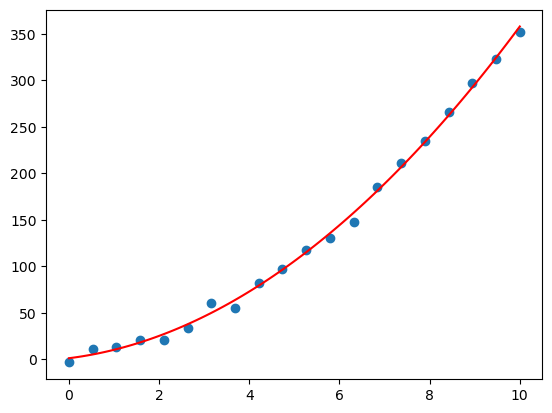

In [17]:
plt.scatter(x_,y_)
plt.plot(X,Y, 'r')